In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('NVL-Historical-Data.csv')

In [3]:
data = data[::-1].reset_index(drop=True)
data['Price'] = data['Price'].str.replace(',', '').astype(float)

In [4]:
data['Time'] = np.arange(len(data.index))

In [5]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Time
0,01/03/2017,25055.0,"25,480","25,480","25,055",1.23M,-1.83%,0
1,01/04/2017,25225.0,"25,055","25,267","25,055",2.49M,0.68%,1
2,01/05/2017,25097.0,"25,182","25,225","25,055",1.50M,-0.51%,2
3,01/06/2017,25140.0,"25,055","25,140","24,970",1.85M,0.17%,3
4,01/09/2017,25182.0,"25,097","25,182","24,928",2.62M,0.17%,4
...,...,...,...,...,...,...,...,...
1795,03/14/2024,16450.0,"16,650","16,750","16,350",16.14M,-0.60%,1795
1796,03/15/2024,16500.0,"16,450","16,800","16,400",19.13M,0.30%,1796
1797,03/18/2024,16700.0,"16,500","17,100","16,150",36.47M,1.21%,1797
1798,03/19/2024,16500.0,"16,900","16,900","16,500",9.76M,-1.20%,1798


In [6]:
# Lấy dữ liệu cần phân tích
time_series_price = data['Price']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(7:3)
train_data_price_73 = time_series_price[:int(0.7*len(time_series_price))]
test_data_price_73 = time_series_price[int(0.7*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(8:2)
train_data_price_82 = time_series_price[:int(0.8*len(time_series_price))]
test_data_price_82 = time_series_price[int(0.8*len(time_series_price)):]

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra(9:1)
train_data_price_91 = time_series_price[:int(0.9*len(time_series_price))]
test_data_price_91 = time_series_price[int(0.9*len(time_series_price)):]

In [7]:
auto_arima(train_data_price_73, maxiter=100)

ARIMA(maxiter=100, order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [8]:
auto_arima(train_data_price_82, maxiter=100)

ARIMA(maxiter=100, order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
auto_arima(train_data_price_91, maxiter=100)

ARIMA(maxiter=100, order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# 7:3
model = ARIMA(train_data_price_73, order=(0,1,1))
fit_model_73= model.fit()

# Dự đoán trên tập kiểm tra
predictions_73 = fit_model_73.forecast(steps=len(test_data_price_73))

# 8:2
model = ARIMA(train_data_price_82, order=(0,1,1))
fit_model_82= model.fit()

# Dự đoán trên tập kiểm tra
predictions_82 = fit_model_82.forecast(steps=len(test_data_price_82))

# 9:1
model = ARIMA(train_data_price_91, order=(1,1,2))
fit_model_91 = model.fit()

# Dự đoán trên tập kiểm tra
predictions_91 = fit_model_91.forecast(steps=len(test_data_price_91))

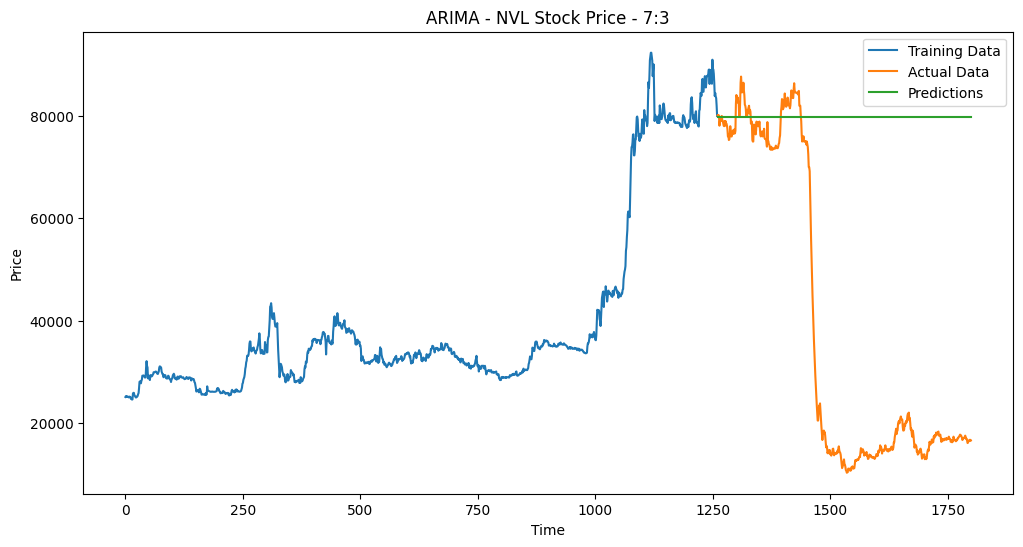

In [11]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_73, label='Training Data')
plt.plot(test_data_price_73.index, test_data_price_73, label='Actual Data')
plt.plot(test_data_price_73.index, predictions_73, label='Predictions')
plt.title('ARIMA - NVL Stock Price - 7:3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_73, predictions_73))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_73, predictions_73)

mape = mean_absolute_percentage_error(test_data_price_73, predictions_73)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 50490.27554512497
MAE: 41245.90788574447
MAPE: 262.194904195936


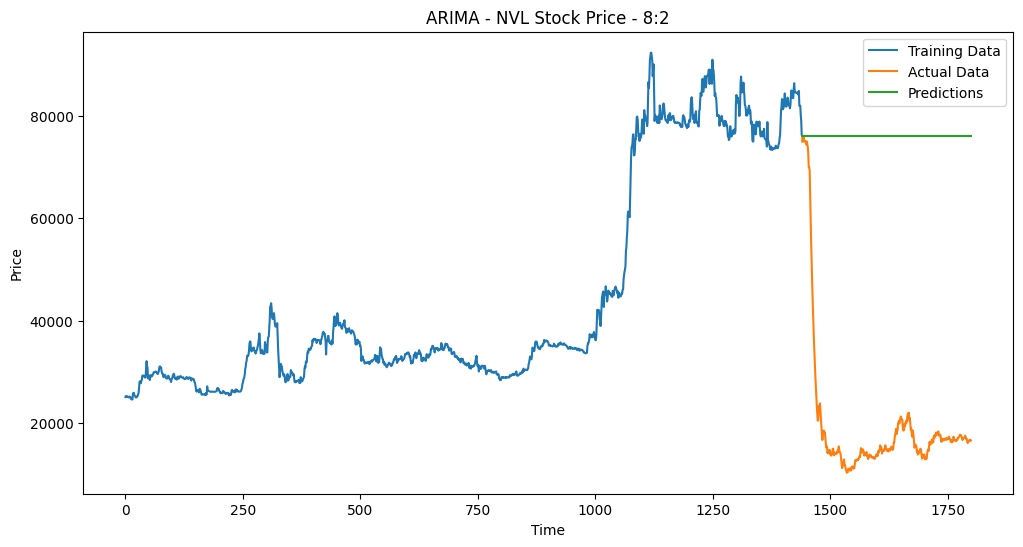

In [15]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_82, label='Training Data')
plt.plot(test_data_price_82.index, test_data_price_82, label='Actual Data')
plt.plot(test_data_price_82.index, predictions_82, label='Predictions')
plt.title('ARIMA - NVL Stock Price - 8:2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_82, predictions_82))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_82, predictions_82)

mape = mean_absolute_percentage_error(test_data_price_82, predictions_82)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 58218.11664926972
MAE: 56601.56760854159
MAPE: 368.70335925054616


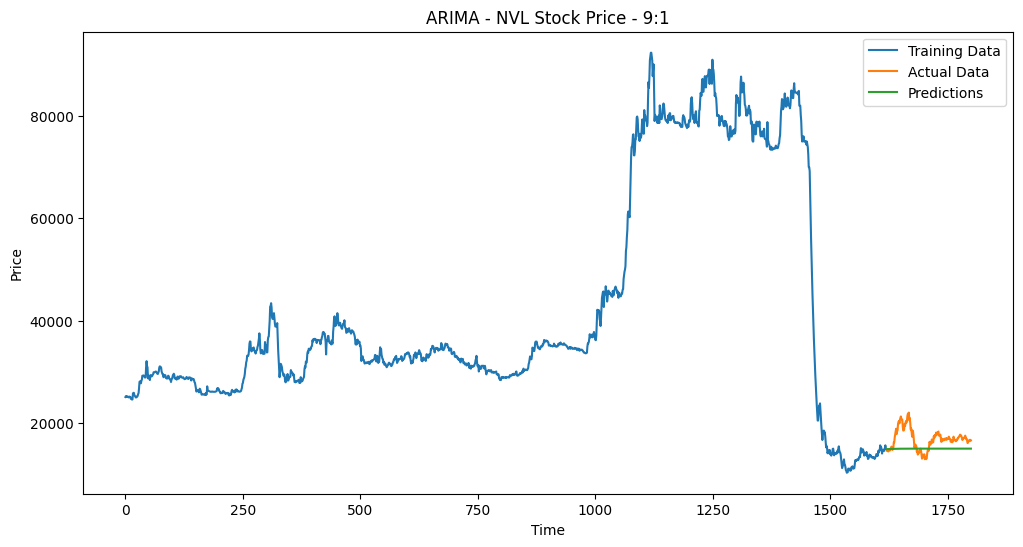

In [17]:
# Trực quan hóa kết quả 
plt.figure(figsize=(12, 6))
plt.plot(train_data_price_91, label='Training Data')
plt.plot(test_data_price_91.index, test_data_price_91, label='Actual Data')
plt.plot(test_data_price_91.index, predictions_91, label='Predictions')
plt.title('ARIMA - NVL Stock Price - 9:1')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(test_data_price_91, predictions_91))

# Tính toán MAE
mae = mean_absolute_error(test_data_price_91, predictions_91)

mape = mean_absolute_percentage_error(test_data_price_91, predictions_91)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 2739.9906901075906
MAE: 2218.7983523027233
MAPE: 12.409890934321382
